# LAB 1: ANN and PyTorch [62 pts]

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

The first part of the lab involves building a neural network from scratch to gain a better understanding of how they work. The second part of the lab involves training a neural network using PyTorch to classify images as either "cat" or "dog".  The code for the neural networks you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: 

# PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part A.0 Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [3]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [4]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [7]:
import numpy as np
#raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [8]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [9]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [10]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Part A.1 Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [11]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)
  
  # softmax
  output = softmax(layer2)
 
  #Back propagation using gradient descent
  
  #cross-entropy loss
  error = -np.sum(y_train*np.log(output))

  #initialize gradients to zero 
  dw0 = np.zeros((num_features,num_hidden))
  dw1 = np.zeros((num_hidden,num_outputs))

  #calculate gradients
  dL_du = output - y_train
  du_dv_hat = w1.T
  dv_hat_dv = layer1*(1-layer1)
  dv_dw0 = X_train
  du_dw1 = layer1

  #determine gradients
  dw1 += du_dw1.T.dot(dL_du)
  dw0 += dv_dw0.T.dot((dL_du).dot(du_dv_hat)*(dv_hat_dv))
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))

  return (error, dW, layer2)


## Part A.2 Train your neural network. How well does your network work on the iris dataset? [5 pt]

Part A.2 of the lab assignment is focused on training the neural network that was created in Part 1. The code initializes the number of hidden units, features, and outputs. Then it initializes random weights for the two layers of the network, and combines them into a single vector W. 

In [12]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [13]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(softmax(y_pred), 0)
pred[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Part A.3 Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

Part A.3 is focused on validating the gradients computed for the 2-layer neural network. The code initializes random weights for the two layers of the network and combines them into a single vector W. It then computes the gradients analytically using the ann() function, and then computes the gradients numerically. The code does this by slightly incrementing the weights and computing the errors for each increment. 

In [16]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] + 0.000001
  We2[ind] = We2[ind] - 0.000001

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 -0.16198336538764124 -0.16198336305183916
0.0 0.13514534202840878 0.13514533495959102
0.0 6.341184175084891 6.341184177431746
0.0 -0.6893901840498984 -0.6893901797878242
0.0 -0.6823359868235457 -0.6823359750185468
0.0 -0.11402704558349797 -0.11402705816960046
0.0 0.09348782725737692 0.09348781589375409
0.0 4.506463596953836 4.5064636032249945
0.0 -0.251172238563413 -0.25117224437579144
0.0 -0.4765474699297556 -0.47654747038641154
0.0 -0.04049620372370555 -0.04049620765775187
0.0 0.03719564745097159 0.03719565658618481
0.0 1.6085549461308801 1.6085549559208907
0.0 -0.36930814673041823 -0.369308155643586
0.0 -0.1919393071148079 -0.19193931161102704
0.0 -0.00460615012798371 -0.004606151172003731
0.0 0.005230639033015905 0.005230633209639884
0.0 0.20283493995520985 0.20283494160660492
0.0 -0.04721454160971916 -0.04721453684694831
0.0 -0.02948159050220056 -0.02948158642320446
0.0 -14.115888717469716 -14.115888718040837
0.0 28.514161584780595 28.514161589568392
0.0 -14.398272874416307 -1

# PART B: Cats vs Dogs [47 pt]

In Part B of the lab, we will use PyTorch to train a neural network to identify cats and Dogs. The code starts by importing some libraries, including numpy, torch, and torchvision. This section provides some helper functions for loading and preprocessing the data.

In [17]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part B.0 Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [18]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cat and dogs, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part B.1 Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the cat and dog categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [19]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=1) # One image per batch

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part B.1.a - [1 pt]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

Your figures should show up directly in the jupyter notebook.

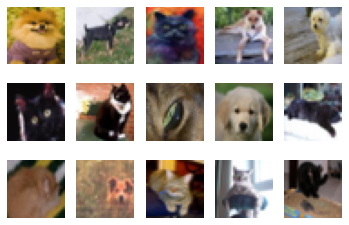

In [21]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part B.1.b - [2 pt]

How many training examples do we have for the combined `cat` and `dog` classes? 
What about validation examples? 
What about test examples?

**There are 8000 training examples for combined cat and dog classes, 2000 validation examples and 2000 test examples.**

### Part B.1.c - [2pt]

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

**The validation set is a crucial component in the training process, as it is used to evaluate the model's performance without participating in the training itself. It is commonly employed to adjust hyperparameters and determine which configuration works best. Additionally, the validation set is used to check for overfitting. If the performance of the validation set remains stable, further training will only increase the performance of the training set but not the validation set, indicating overfitting. The validation set helps improve the generalization of the model and also determines when to stop training. Using the training loss instead of the validation loss may lead to overestimating the model's performance, while a smoothly decreasing training loss may indicate underfitting.**

## Part B.2 Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [28]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [29]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [30]:
small_net = SmallNet()
large_net = LargeNet()

### Part B.2.a - [1pt]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [31]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [32]:
for param in large_net.parameters():
    print(param.shape)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [33]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cats and dogs
    target_classes = ["cat", "dog"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part B.2.b - [1pt]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

**batch_size=64, learning_rate=0.01, num_epochs=30**

### Part B.2.c - [1 pt]

What files stored in memory when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [34]:
train_net(small_net,num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.41625, Train loss: 0.6708743505477905 |Validation err: 0.3755, Validation loss: 0.6510412488132715
Epoch 2: Train err: 0.353375, Train loss: 0.6346874723434448 |Validation err: 0.3685, Validation loss: 0.6411604918539524
Epoch 3: Train err: 0.345125, Train loss: 0.6229027538299561 |Validation err: 0.3445, Validation loss: 0.6210675686597824
Epoch 4: Train err: 0.335125, Train loss: 0.6104175071716309 |Validation err: 0.36, Validation loss: 0.6280843652784824
Epoch 5: Train err: 0.32225, Train loss: 0.6016388692855835 |Validation err: 0.3335, Validation loss: 0.613157395273447
Finished Training
Total time elapsed: 17.97 seconds


In [35]:
list1 = ["model_small_bs64_lr0.01_epoch0", "model_small_bs64_lr0.01_epoch1", "model_small_bs64_lr0.01_epoch2", "model_small_bs64_lr0.01_epoch3", "model_small_bs64_lr0.01_epoch4", "model_small_bs64_lr0.01_epoch4_train_err", "model_small_bs64_lr0.01_epoch4_train_loss", "model_small_bs64_lr0.01_epoch4_val_err.csv", "model_small_bs64_lr0.01_epoch4_val_loss.csv"]
print(list1)

['model_small_bs64_lr0.01_epoch0', 'model_small_bs64_lr0.01_epoch1', 'model_small_bs64_lr0.01_epoch2', 'model_small_bs64_lr0.01_epoch3', 'model_small_bs64_lr0.01_epoch4', 'model_small_bs64_lr0.01_epoch4_train_err', 'model_small_bs64_lr0.01_epoch4_train_loss', 'model_small_bs64_lr0.01_epoch4_val_err.csv', 'model_small_bs64_lr0.01_epoch4_val_loss.csv']


### Part B.2.d - [2pt]

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [36]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
train_net(large_net)
train_net(small_net)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.484375, Train loss: 0.6924183211326599 |Validation err: 0.4325, Validation loss: 0.6906187143176794
Epoch 2: Train err: 0.448, Train loss: 0.6874387178421021 |Validation err: 0.417, Validation loss: 0.6808027550578117
Epoch 3: Train err: 0.415375, Train loss: 0.6749918999671936 |Validation err: 0.3865, Validation loss: 0.659886347129941
Epoch 4: Train err: 0.393, Train loss: 0.6589927148818969 |Validation err: 0.3865, Validation loss: 0.6519871968775988
Epoch 5: Train err: 0.371625, Train loss: 0.6471947617530823 |Validation err: 0.374, Validation loss: 0.6441020853817463
Epoch 6: Train err: 0.356375, Train loss: 0.6289517824649811 |Validation err: 0.3505, Validation loss: 0.6252972185611725
Epoch 7: Train err: 0.33875, Train loss: 0.6165723142623901 |Validation err: 0.333, Validation loss: 0.6163844652473927
Epoch 8: Train err: 0.326875, Train loss: 0.5994892749786377 |Validation err: 0.3

### Part B.2.e - [2pt]

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

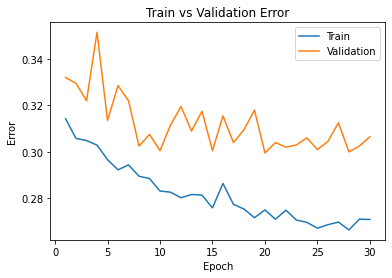

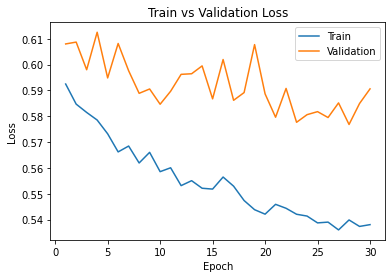

In [38]:
#model_path = get_model_name("small", batch_size=??, learning_rate=??, epoch=29)
model_path1 = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path1)

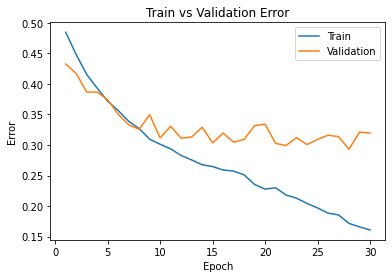

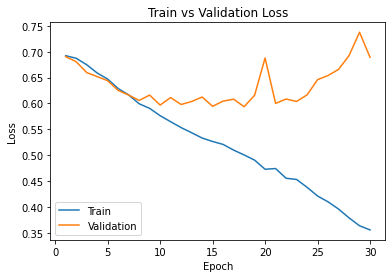

In [40]:
model_path2 = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path2)

### Part B.2.f - [3pt]

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

**The training curve generally decreases as the number of epochs increases. The validation curve, however, plateaus around epoch 7. The small_net curve has fluctuations and decreases at different epochs, potentially due to a high learning rate. The large_net curve, on the other hand, shows smoother variations. Overfitting occurs when the training loss continues to decrease while the validation loss stops declining around epoch 7, indicating that the model is fitting the training data too closely.**

## Part B.3 Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part B.3.a - [1pt]

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.50225, Train loss: 0.6945205240249633 |Validation err: 0.491, Validation loss: 0.6929903607815504
Epoch 2: Train err: 0.50225, Train loss: 0.6930275931358337 |Validation err: 0.491, Validation loss: 0.6924116816371679
Epoch 3: Train err: 0.487375, Train loss: 0.6922533187866211 |Validation err: 0.4765, Validation loss: 0.6920256800949574
Epoch 4: Train err: 0.448625, Train loss: 0.6916869764328003 |Validation err: 0.4515, Validation loss: 0.6913820113986731
Epoch 5: Train err: 0.44225, Train loss: 0.6910718812942505 |Validation err: 0.4415, Validation loss: 0.6910950168967247
Epoch 6: Train err: 0.44025, Train loss: 0.6903757758140564 |Validation err: 0.437, Validation loss: 0.6905075237154961
Epoch 7: Train err: 0.43825, Train loss: 0.6895534009933472 |Validation err: 0.434, Validation loss: 0.6896947920322418
Epoch 8: Train err: 0.439, Train loss: 0.6884737334251404 |Validation err: 0.43

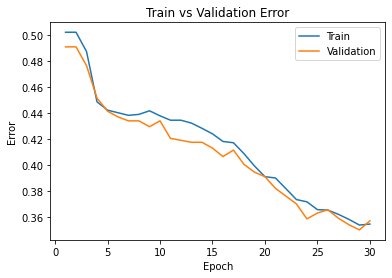

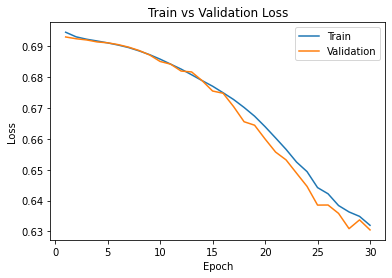

In [42]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)
model_path3 = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(model_path3)

**The training process for the model takes a bit more time. However, the issue of overfitting is resolved and the error and loss values for both the training and validation sets are nearly the same and continuously decrease until reaching epoch 30. The curves have a smooth downward trend.**

### Part B.3.b - [1pt]

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.394375, Train loss: 0.6583439974784852 |Validation err: 0.3665, Validation loss: 0.6302683055400848
Epoch 2: Train err: 0.35475, Train loss: 0.6260433626174927 |Validation err: 0.3525, Validation loss: 0.6150094550102949
Epoch 3: Train err: 0.33775, Train loss: 0.6079716925621033 |Validation err: 0.351, Validation loss: 0.6075180452316999
Epoch 4: Train err: 0.312625, Train loss: 0.5837899551391602 |Validation err: 0.33, Validation loss: 0.6287574917078018
Epoch 5: Train err: 0.308375, Train loss: 0.5802531237602234 |Validation err: 0.337, Validation loss: 0.6012802347540855
Epoch 6: Train err: 0.295375, Train loss: 0.5642361807823181 |Validation err: 0.32, Validation loss: 0.6204832252115011
Epoch 7: Train err: 0.289, Train loss: 0.5474876840114593 |Validation err: 0.3045, Validation loss: 0.6010499075055122
Epoch 8: Train err: 0.281125, Train loss: 0.5377589094638825 |Validation err: 0.3

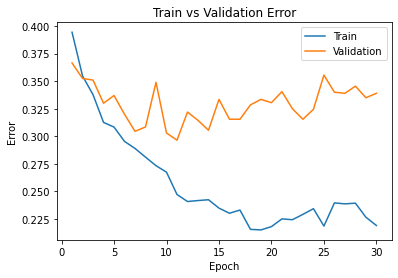

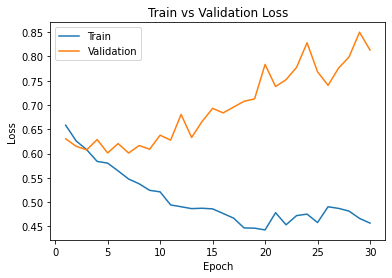

In [43]:
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
model_path4 = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(model_path4)

**The model take slightly shorter to train, 0.2s shorter. Both curves divergers through epoches. Training error are stabilized at a lower level than the previous model but the validation error increases through iterations. Overfitting appear when about epoch=3.**

### Part B.3.c - [1pt]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.19575, Train loss: 0.4064096547663212 |Validation err: 0.3355, Validation loss: 0.8269802033901215
Epoch 2: Train err: 0.18, Train loss: 0.3720658663660288 |Validation err: 0.328, Validation loss: 0.8464575409889221
Epoch 3: Train err: 0.171625, Train loss: 0.35169390961527824 |Validation err: 0.3245, Validation loss: 0.8524486273527145
Epoch 4: Train err: 0.16275, Train loss: 0.3384440913796425 |Validation err: 0.322, Validation loss: 0.8657066822052002
Epoch 5: Train err: 0.158875, Train loss: 0.32768719270825386 |Validation err: 0.318, Validation loss: 0.8755576759576797
Epoch 6: Train err: 0.153125, Train loss: 0.3187465127557516 |Validation err: 0.321, Validation loss: 0.8893200159072876
Epoch 7: Train err: 0.15125, Train loss: 0.31172184832394123 |Validation err: 0.3175, Validation loss: 0.8991232663393021
Epoch 8: Train err: 0.14975, Train loss: 0.3051171824336052 |Validation err: 0

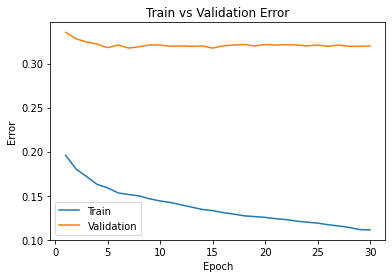

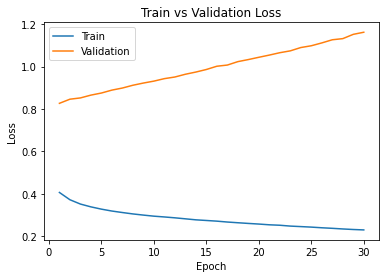

In [44]:
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
model_path5 = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(model_path5)

**The model much shorter time to train(around 20 seconds), and there is large gap between train and validation curve. But training error and validation error are relative low. Both validation curves are steady. The train curves drops steeply.**

### Part B.3.d - [1pt]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.135375, Train loss: 0.2808246087953448 |Validation err: 0.3205, Validation loss: 1.085014197707176
Epoch 2: Train err: 0.12325, Train loss: 0.2538123414814472 |Validation err: 0.3145, Validation loss: 1.2240356664657592
Epoch 3: Train err: 0.10925, Train loss: 0.22803825553692877 |Validation err: 0.304, Validation loss: 1.4184806059598922
Epoch 4: Train err: 0.098375, Train loss: 0.21031779800914227 |Validation err: 0.3135, Validation loss: 1.5510237543582917
Epoch 5: Train err: 0.09225, Train loss: 0.19863267441280186 |Validation err: 0.3135, Validation loss: 1.5528748394846916
Epoch 6: Train err: 0.088, Train loss: 0.19467944092862308 |Validation err: 0.3185, Validation loss: 1.4879377598762513
Epoch 7: Train err: 0.089375, Train loss: 0.19999832493811845 |Validation err: 0.3175, Validation loss: 1.5686389813423156
Epoch 8: Train err: 0.0885, Train loss: 0.1893228123933077 |Validation er

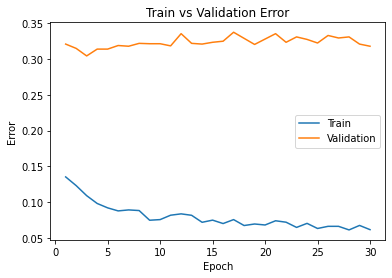

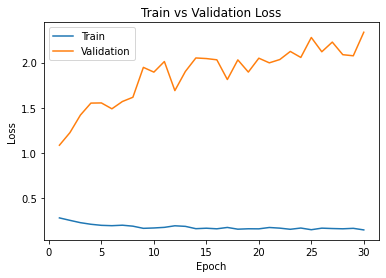

In [45]:
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
model_path5 = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(model_path5)

**This model took longer to train, and there is large gap between train and validation curve. But training error and validation error are relative low. **

## Part B.4 Hyperparameter Search [4 pt]

### Part B.4.a - [1pt]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

**train_net(large_net, batch_size=1280, learning_rate=0.05, num_epochs=30)**

**A large batch size is chosen to avoid slow convergence from a small batch size. A larger batch size decreases the number of iterations needed per epoch and speeds up processing. It also results in a smoother curve with a clearer downward trend and less fluctuation. Additionally, the learning rate is increased to minimize weight variation.**

### Part B.4.b - [1pt]

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.481875, Train loss: 0.6929566775049482 |Validation err: 0.467, Validation loss: 0.6924778819084167
Epoch 2: Train err: 0.453875, Train loss: 0.6922586049352374 |Validation err: 0.4425, Validation loss: 0.6910704672336578
Epoch 3: Train err: 0.44425, Train loss: 0.6909541743142265 |Validation err: 0.428, Validation loss: 0.6896577179431915
Epoch 4: Train err: 0.434625, Train loss: 0.6893338901656014 |Validation err: 0.4295, Validation loss: 0.6866695582866669
Epoch 5: Train err: 0.442375, Train loss: 0.6864117213657924 |Validation err: 0.4245, Validation loss: 0.6823064386844635
Epoch 6: Train err: 0.436125, Train loss: 0.6839358721460614 |Validation err: 0.411, Validation loss: 0.6793046295642853
Epoch 7: Train err: 0.425, Train loss: 0.6799858978816441 |Validation err: 0.4125, Validation loss: 0.6765968501567841
Epoch 8: Train err: 0.416, Train loss: 0.6758623038019452 |Validation err: 0.

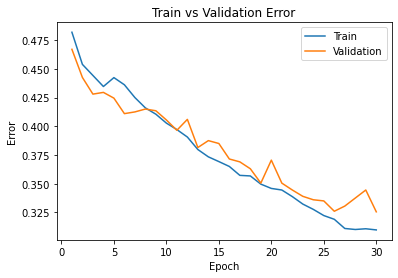

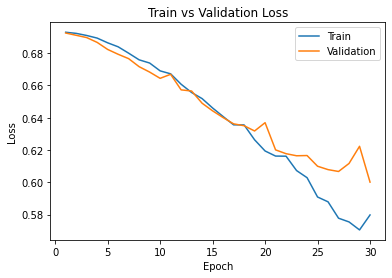

In [46]:
large_net = LargeNet()
train_net(large_net, batch_size=1280, learning_rate=0.05, num_epochs=30)
model_path_3 = get_model_name("large", batch_size=1280, learning_rate=0.05, epoch=29)
plot_training_curve(model_path_3)

### Part B.4.c - [1pt]

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

**train_net(large_net, batch_size=256, learning_rate=0.04, num_epochs=15)**

**try reducing the learning rate a little to get a smoother curve and with a smaller batch size**

### Part B.4.d - [1pt]

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.448, Train loss: 0.691458759829402 |Validation err: 0.4265, Validation loss: 0.686768151819706
Epoch 2: Train err: 0.431, Train loss: 0.6826735511422157 |Validation err: 0.423, Validation loss: 0.6765216439962387
Epoch 3: Train err: 0.41325, Train loss: 0.6731199007481337 |Validation err: 0.398, Validation loss: 0.6614638417959213
Epoch 4: Train err: 0.3875, Train loss: 0.658837728202343 |Validation err: 0.3795, Validation loss: 0.6476690247654915
Epoch 5: Train err: 0.3645, Train loss: 0.6406910419464111 |Validation err: 0.3625, Validation loss: 0.6376845762133598
Epoch 6: Train err: 0.34575, Train loss: 0.623412286862731 |Validation err: 0.3505, Validation loss: 0.6382958889007568
Epoch 7: Train err: 0.35875, Train loss: 0.6329823601990938 |Validation err: 0.34, Validation loss: 0.6148923113942146
Epoch 8: Train err: 0.32775, Train loss: 0.6016132608056068 |Validation err: 0.3105, Valida

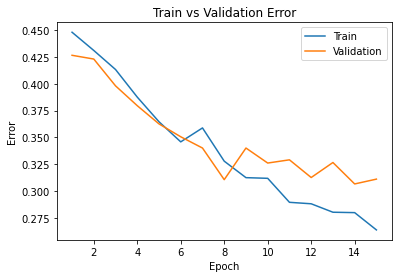

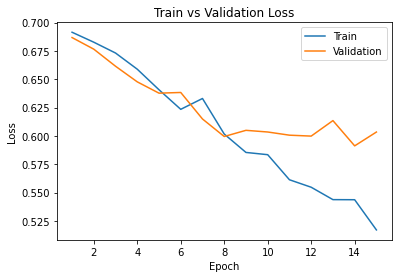

In [50]:
large_net = LargeNet()
train_net(large_net, batch_size=256, learning_rate=0.04, num_epochs=15)
model_path_4 = get_model_name("large", batch_size=256, learning_rate=0.04, epoch=14)
plot_training_curve(model_path_4)

## Part B.5 Evaluating the Best Model [9 pt]


### Part B.5.a - [1pt]

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [51]:
net = LargeNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.04, epoch=14)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part B.5.b - [2pt]

Justify your choice of model from part (a).

**This set of hyperparams leads to low stability in validation error/loss and good convergence. Large batch size results in small training loss & smooth curve, but reducing it improves generalization. Accurate results can still be achieved with fewer epochs. The learning rate of 0.05 prevents model from getting stuck in local optimum. No severe under/overfitting observed.**

### Part B.5.c - [2pt]

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [52]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=64)

test_error, test_loss = evaluate(net, test_loader, nn.BCEWithLogitsLoss())
print("The test classification error is {} and the test loss is {}.".format(test_error, test_loss))

Files already downloaded and verified
Files already downloaded and verified
The test classification error is 0.308 and the test loss is 0.5761052248999476.


### Part B.5.d - [2pt]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

**Test error higher than validation error. Model chosen for generalization. Selecting hyperparams with validation set is part of hyperparameter training, hence low validation error/loss. Test set consists of unknown data.**

### Part B.5.e - [2pt]

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

**The final test set plays a crucial role in evaluating the generalization ability of the final model after tuning the hyperparameters. The tuning process results in a model that performs well on the validation set, however, it is important to note that this performance may not necessarily translate to the entire dataset. The reason being, during the process of adjusting the hyperparameters, the direction of the adjustments are made with the goal of minimizing the error on the validation set.**

**While this reduction of error on the validation set is a natural outcome of the hyperparameter tuning process, it does not necessarily mean that the error on the entire dataset will also be small. This is because the validation set has participated in the training of the hyperparameters and therefore, the error on the validation set is bound to decrease during the tuning process.**

**Hence, it becomes crucial to have another dataset, the test set, to evaluate the true generalization ability of the model. The test set, consisting of completely unknown data, is the best indicator of how well the model will perform on unseen data. To conclude, while the validation set plays a crucial role in the tuning process of the hyperparameters, it is the test set that provides the true measure of the model's generalization ability.**

## Part B.6 Fully-Connected Linear ANN vs CNN [9 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


### Part B.6.a - [3 pt]

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying cat and dog images?

In [53]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.474, Train loss: 0.6913982629776001 |Validation err: 0.4365, Validation loss: 0.6867041885852814
Epoch 2: Train err: 0.413875, Train loss: 0.6822427324950695 |Validation err: 0.4215, Validation loss: 0.6766157001256943
Epoch 3: Train err: 0.405375, Train loss: 0.6733222454786301 |Validation err: 0.409, Validation loss: 0.6688094288110733
Epoch 4: Train err: 0.3985, Train loss: 0.6663560792803764 |Validation err: 0.404, Validation loss: 0.6633128821849823
Epoch 5: Train err: 0.39475, Train loss: 0.6603970639407635 |Validation err: 0.4035, Validation loss: 0.6602502912282944
Epoch 6: Train err: 0.389875, Train loss: 0.6560465022921562 |Validation err: 0.399, Validation loss: 0.6575935631990433
Epoch 7: Train err: 0.384, Train loss: 0.6512962765991688 |Validation err: 0.396, Validation loss: 0.6556490957736969
Epoch 8: Train err: 0.374, Train loss: 0.6463666521012783 |Validation err: 0.389, V

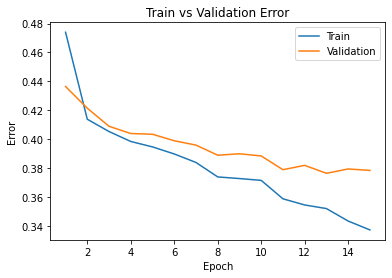

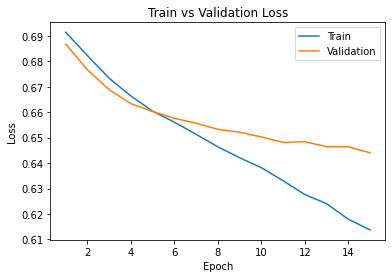

In [54]:
train_net(simpleANN(), batch_size=512, learning_rate=0.01, num_epochs=15)
ANN_model_path = get_model_name("simple", batch_size=512, learning_rate=0.01, epoch=14)
plot_training_curve(ANN_model_path)

In [58]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=64)

net = simpleANN()
test_error, test_loss = evaluate(net, test_loader, nn.BCEWithLogitsLoss())
print("The test classification error is {} and the test loss is {}.".format(test_error, test_loss))

Files already downloaded and verified
Files already downloaded and verified
The test classification error is 0.5235 and the test loss is 0.694706529378891.


Performs worse than 2-layer linear ANN model with higher validation error/loss. Test classification error and loss stay at 0.5235, also worse than 2-layer model.

### Part B.6.b - [6 pt]

Implement a 3-layer ANN architecture with dropout and batch normalization (separately). Compare the performance of this model with the simpleANN model provided above.

In [61]:
# define model here

class dropoutANN(nn.Module):
    def __init__(self):
        super(dropoutANN, self).__init__()
        self.name = "simple"
        nn.Dropout(p=0.2)
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20) 
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [65]:

class batchnormalizeANN(nn.Module):
    def __init__(self):
        super(batchnormalizeANN, self).__init__()
        self.name = "batchnormalize"
        nn.BatchNorm1d(100)
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20) 
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47375, Train loss: 0.6907910220324993 |Validation err: 0.442, Validation loss: 0.6899188309907913
Epoch 2: Train err: 0.423375, Train loss: 0.6857714504003525 |Validation err: 0.427, Validation loss: 0.6856725811958313
Epoch 3: Train err: 0.413125, Train loss: 0.681099396198988 |Validation err: 0.4215, Validation loss: 0.6821902543306351
Epoch 4: Train err: 0.407625, Train loss: 0.6760276965796947 |Validation err: 0.416, Validation loss: 0.6779527366161346
Epoch 5: Train err: 0.403, Train loss: 0.6700887195765972 |Validation err: 0.407, Validation loss: 0.6733241826295853
Epoch 6: Train err: 0.398125, Train loss: 0.6646577976644039 |Validation err: 0.4035, Validation loss: 0.6683549135923386
Epoch 7: Train err: 0.3925, Train loss: 0.659258134663105 |Validation err: 0.4005, Validation loss: 0.6645481735467911
Epoch 8: Train err: 0.385125, Train loss: 0.653729859739542 |Validation err: 0.400

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f2ca67f34c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch 12: Train err: 0.361375, Train loss: 0.6346277259290218 |Validation err: 0.391, Validation loss: 0.6532363593578339
Epoch 13: Train err: 0.35525, Train loss: 0.6315291002392769 |Validation err: 0.385, Validation loss: 0.6504368335008621
Epoch 14: Train err: 0.35275, Train loss: 0.6267612278461456 |Validation err: 0.3855, Validation loss: 0.650014117360115
Epoch 15: Train err: 0.349375, Train loss: 0.6234389096498489 |Validation err: 0.391, Validation loss: 0.6482791006565094
Finished Training
Total time elapsed: 47.88 seconds


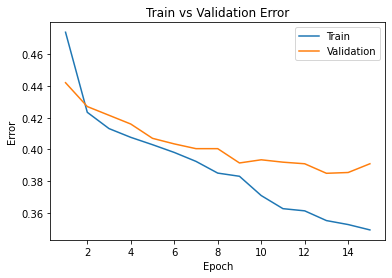

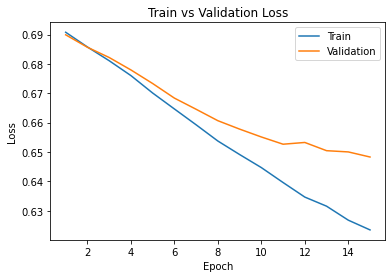

In [63]:
# perform your comparison here
train_net(dropoutANN(), batch_size=512, learning_rate=0.01, num_epochs=15)
ANN_model_path = get_model_name("simple", batch_size=512, learning_rate=0.01, epoch=14)
plot_training_curve(ANN_model_path)

In [64]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=64)

net = dropoutANN()
test_error, test_loss = evaluate(net, test_loader, nn.BCEWithLogitsLoss())
print("The test classification error is {} and the test loss is {}.".format(test_error, test_loss))

Files already downloaded and verified
Files already downloaded and verified
The test classification error is 0.5 and the test loss is 0.6948988772928715.


**with a dropout rate of 0.2, the model performs a little better in terms of error, but the loss is higher than the simpleANN model.**

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.47025, Train loss: 0.6903124935925007 |Validation err: 0.4445, Validation loss: 0.6859506666660309
Epoch 2: Train err: 0.41425, Train loss: 0.6797194816172123 |Validation err: 0.414, Validation loss: 0.6744130998849869
Epoch 3: Train err: 0.403375, Train loss: 0.6712964847683907 |Validation err: 0.411, Validation loss: 0.667432114481926
Epoch 4: Train err: 0.3975, Train loss: 0.6652403399348259 |Validation err: 0.407, Validation loss: 0.6626896411180496
Epoch 5: Train err: 0.392375, Train loss: 0.659909937530756 |Validation err: 0.4065, Validation loss: 0.6599457561969757
Epoch 6: Train err: 0.390625, Train loss: 0.656075581908226 |Validation err: 0.405, Validation loss: 0.6571819931268692
Epoch 7: Train err: 0.38275, Train loss: 0.6518030129373074 |Validation err: 0.402, Validation loss: 0.6553058624267578
Epoch 8: Train err: 0.377875, Train loss: 0.6476419754326344 |Validation err: 0.396

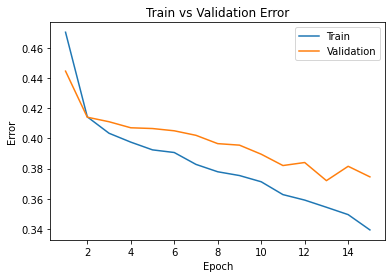

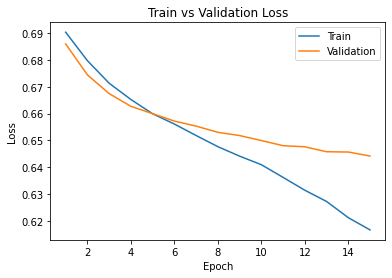

In [67]:
# perform your comparison here
train_net(batchnormalizeANN(), batch_size=512, learning_rate=0.01, num_epochs=15)
ANN_model_path = get_model_name("batchnormalize", batch_size=512, learning_rate=0.01, epoch=14)
plot_training_curve(ANN_model_path)

In [73]:
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["cat", "dog"], 
    batch_size=64)

net = batchnormalizeANN()
test_error, test_loss = evaluate(net, test_loader, nn.BCEWithLogitsLoss())
print("The test classification error is {} and the test loss is {}.".format(test_error, test_loss))

Files already downloaded and verified
Files already downloaded and verified
The test classification error is 0.5 and the test loss is 0.6939806789159775.


**with a normalized batch of 100, the model performs a little better in terms of error and loss than the simpleANN model.**

## Part B.7-Conceptual Questions [6 pt]

### Part B.7.a - [3 pt]

Explain the difference between L1 and L2 regularization and when it is appropriate to use one over the other. How would you implement L1 regularization in simpleANN?


L1 and L2 regularization are methods used in machine learning to prevent overfitting. Overfitting occurs when a model becomes too complex and starts to fit the noise in the data, instead of the underlying pattern. Regularization adds a penalty term to the loss function to reduce the complexity of the model.

L1 regularization adds the sum of the absolute values of the model parameters as the penalty term, leading to sparse solutions where some parameters are exactly zero. L1 regularization is often used when we have a large number of features and we want to select a subset of the most important features.

L2 regularization, on the other hand, adds the sum of the squared values of the model parameters as the penalty term, leading to small but non-zero parameter values. L2 regularization is often used in cases where we don't have prior knowledge of which features are important and we want to spread the importance of the parameters evenly among all features.

To implement L1 regularization in simple ANN, we would add a penalty term to the loss function that is proportional to the sum of absolute values of the model parameters. For example, if the model parameters are represented by a matrix W and the regularization parameter is lambda, the loss function with L1 regularization would be:

Loss = mean_squared_error(y_pred, y_true) + lambda * sum(abs(W))

This loss function can be optimized using gradient descent or any other optimization algorithm to find the optimal values of the model parameters that balance the trade-off between fitting the data and reducing overfitting.

### Part B.7.b - [3 pt]

Describe the impact of different activation functions (e.g. ReLU, Sigmoid, Tanh) on the performance of the model. How would you go about choosing the appropriate activation function for simpleANN?

The choice of activation function has a significant impact on the performance of a neural network. Different activation functions have different properties that can affect the speed and convergence of the model, as well as its ability to model non-linear relationships in the data.

ReLU (Rectified Linear Unit) is a popular activation function that maps all negative input values to zero and passes positive input values unchanged. This activation function is fast to compute and has been shown to improve convergence speed in deep neural networks. However, ReLU units can also die during training if their weights are not initialized properly, which can result in the network getting stuck in a suboptimal solution.

Sigmoid activation maps the input to the range [0, 1]. This activation function is useful for modeling binary classification problems, but its output saturates to either 0 or 1 as the input becomes very large or very small, which can slow down convergence and lead to vanishing gradients.

Tanh (Hyperbolic Tangent) activation maps the input to the range [-1, 1]. Like the sigmoid function, the tanh activation is used for binary classification problems, but its output is centered at zero, which helps the model learn faster and avoid the vanishing gradient problem.

When choosing the activation function for simpleANN, the appropriate function depends on the problem being solved and the type of data being used. If the problem is binary classification, sigmoid or tanh activation may be a good choice. If the problem is regression or multi-class classification, ReLU activation may be a good starting point because it is fast to compute and often leads to good performance. It is also common to experiment with different activation functions and select the one that provides the best performance on a validation set.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus